In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv, re
import nltk
import string
from html.parser import HTMLParser
import pickle
import logging

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD, NMF
from gensim import corpora, models, similarities, matutils



In [3]:
# nltk.download('wordnet')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
df = pd.read_csv('tweets_4emotions.csv')

In [5]:
df = df.iloc[:,0:3]
df
# add feature that looks at profanity using fuzzywuzzy

,ID,content,emotion
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger
1,10001,So my Indian Uber driver just called someone t...,anger
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger
3,10003,so ef whichever butt wipe pulled the fire alar...,anger
4,10004,Don't join @BTCare they put the phone down on ...,anger
5,10005,My blood is boiling,anger
6,10006,When you've still got a whole season of Wentwo...,anger
7,10007,@bt_uk why does tracking show my equipment del...,anger
8,10008,@TeamShanny legit why i am so furious with him...,anger
9,10009,How is it suppose to work if you do that? Wtf ...,anger


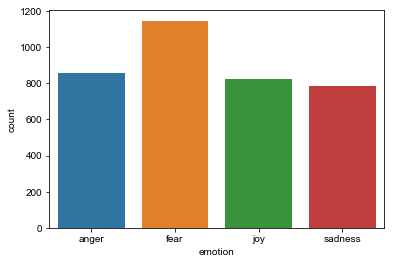

In [6]:
ax = sns.countplot(x="emotion", data=df)
sns.set(rc={'figure.figsize':(15.7,12.27)})

In [7]:
# replacing all punctuation apart from @ mentions with '' and making lower case
df['regex'] = df['content'].apply(lambda x: re.sub("[^@ a-z]","",x.lower()))

In [8]:
# removing twitter handles
df['remove_mentions'] = df['regex'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)","",x).split()))

In [9]:
# replacing some slang
df['no_slang'] = df['remove_mentions'].apply(lambda x: re.sub('(ahhh|ahhhh|ahhhh|ahhhhh|ahhhhhh|ahhhhhh)',
                            'ahh',x)).apply(lambda x: re.sub('(hahaha|hahahaha|hahahahaha)','haha'
                                ,x)).apply(lambda x: re.sub('(awww|awwww|awwwww|awwwwww|awwwwwww|awwwwwwww)','aww',x))

In [10]:
df.head()

,ID,content,emotion,regex,remove_mentions,no_slang
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...
1,10001,So my Indian Uber driver just called someone t...,anger,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,@dpduk i asked for my parcel to be delivered t...,i asked for my parcel to be delivered to a pic...,i asked for my parcel to be delivered to a pic...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...
4,10004,Don't join @BTCare they put the phone down on ...,anger,dont join @btcare they put the phone down on y...,dont join they put the phone down on you talk ...,dont join they put the phone down on you talk ...


In [11]:
# my own replacement of slang words

df['shorthand'] = df['no_slang'].str.replace(' bc ', ' because ').str.replace(' u ', 
                                ' you ').str.replace(' bf ', ' boyfriend ').str.replace(' gf ', ' girlfriend ').str.replace(' nyt ', 
                                ' night ').str.replace(' ima ', ' i am going to ').str.replace(' wut ', ' what ').str.replace(' wud ', 
                                ' would ').str.replace(' n ', ' and ').str.replace(' fuk ', ' fuck ').str.replace(' gd ', 
                                ' good ').str.replace(' nite ', ' night ').str.replace(' hubs ', ' husband ').str.replace(' dat ', 
                                ' that ').str.replace(' don ', ' ').str.replace(' amp ', ' ').str.replace(' fuking ', 
                                ' fucking ').str.replace(' fuked ', ' fucked ')

In [12]:
# look at particular emotions
# test = df.loc[df['emotion'] == 'sadness']
# test

In [13]:
# remove words of up to 3 characters

df['shorthand'] = df['shorthand'].apply(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

In [14]:
df.head()

,ID,content,emotion,regex,remove_mentions,no_slang,shorthand
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...,how the fuck who the heck moved fridge should...
1,10001,So my Indian Uber driver just called someone t...,anger,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,indian uber driver just called someone the a...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,@dpduk i asked for my parcel to be delivered t...,i asked for my parcel to be delivered to a pic...,i asked for my parcel to be delivered to a pic...,asked for parcel delivered pick store n...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,whichever butt wipe pulled the fire alarm d...
4,10004,Don't join @BTCare they put the phone down on ...,anger,dont join @btcare they put the phone down on y...,dont join they put the phone down on you talk ...,dont join they put the phone down on you talk ...,dont join they put the phone down you talk ov...


In [15]:
# remove stop words
stop_words = text.ENGLISH_STOP_WORDS.union()
df['no_stop_words'] = df['shorthand'].apply(lambda x: " ".join([word for word in x.split(" ") if word not in stop_words]))

### Lemmatization

In [16]:
lmtzr = WordNetLemmatizer()
df['stemmed'] = df['no_stop_words'].apply(lambda x: ' '.join([lmtzr.lemmatize(word, 'v') for word in x.split() ]))

In [17]:
df.head(20)

,ID,content,emotion,regex,remove_mentions,no_slang,shorthand,no_stop_words,stemmed
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...,how the fuk who the heck moved my fridge shoul...,how the fuck who the heck moved fridge should...,fuck heck moved fridge knock landlord door a...,fuck heck move fridge knock landlord door angr...
1,10001,So my Indian Uber driver just called someone t...,anger,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,so my indian uber driver just called someone t...,indian uber driver just called someone the a...,indian uber driver just called word wasnt ...,indian uber driver just call word wasnt move v...
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,@dpduk i asked for my parcel to be delivered t...,i asked for my parcel to be delivered to a pic...,i asked for my parcel to be delivered to a pic...,asked for parcel delivered pick store n...,asked parcel delivered pick store addr...,ask parcel deliver pick store address fume poo...
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,so ef whichever butt wipe pulled the fire alar...,whichever butt wipe pulled the fire alarm d...,whichever butt wipe pulled alarm davis sou...,whichever butt wipe pull alarm davis sound asl...
4,10004,Don't join @BTCare they put the phone down on ...,anger,dont join @btcare they put the phone down on y...,dont join they put the phone down on you talk ...,dont join they put the phone down on you talk ...,dont join they put the phone down you talk ov...,dont join phone talk rude taking money acc ...,dont join phone talk rude take money acc willy...
5,10005,My blood is boiling,anger,my blood is boiling,my blood is boiling,my blood is boiling,blood boiling,blood boiling,blood boil
6,10006,When you've still got a whole season of Wentwo...,anger,when youve still got a whole season of wentwor...,when youve still got a whole season of wentwor...,when youve still got a whole season of wentwor...,when youve still got whole season wentworth ...,youve got season wentworth watch stupid cu...,youve get season wentworth watch stupid cunt w...
7,10007,@bt_uk why does tracking show my equipment del...,anger,@btuk why does tracking show my equipment deli...,why does tracking show my equipment delivered ...,why does tracking show my equipment delivered ...,why does tracking show equipment delivered wh...,does tracking equipment delivered wasnt se...,do track equipment deliver wasnt service sudde...
8,10008,@TeamShanny legit why i am so furious with him...,anger,@teamshanny legit why i am so furious with him...,legit why i am so furious with him people are ...,legit why i am so furious with him people are ...,legit why furious with him people are such ...,legit furious people fucking idiots,legit furious people fuck idiots
9,10009,How is it suppose to work if you do that? Wtf ...,anger,how is it suppose to work if you do that wtf d...,how is it suppose to work if you do that wtf d...,how is it suppose to work if you do that wtf d...,how suppose work you that wtf dude thanks...,suppose work wtf dude thanks pissing,suppose work wtf dude thank piss


In [21]:
df.to_pickle('tweet_data.pkl')

In [ ]:
# word cloud

# ang_df = df.loc[df['emotion'] == 'anger']
# joy_df = df.loc[df['emotion'] == 'joy']
# fear_df = df.loc[df['emotion'] == 'fear']
# sad_df = df.loc[df['emotion'] == 'sadness']

In [ ]:
# Tweet_a = " ".join(review for review in ang_df.stemmed)
# Tweet_f = " ".join(review for review in fear_df.stemmed)
# Tweet_j = " ".join(review for review in joy_df.stemmed)
# Tweet_s = " ".join(review for review in sad_df.stemmed)
# fig, ax = plt.subplots(4, 1, figsize  = (30,30))

# # Create and generate a word cloud image:
# wordcloud_a = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_a)
# wordcloud_f = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_f)
# wordcloud_j = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_j)
# wordcloud_s = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_s)

# # Display the generated image:
# ax[0].imshow(wordcloud_a, interpolation='bilinear')
# ax[0].set_title('Anger Words', fontsize=30)
# ax[0].axis('off')
# ax[1].imshow(wordcloud_f, interpolation='bilinear')
# ax[1].set_title('Fear Words',fontsize=30)
# ax[1].axis('off')
# ax[2].imshow(wordcloud_j, interpolation='bilinear')
# ax[2].set_title('Joy Words',fontsize=30)
# ax[2].axis('off')
# ax[3].imshow(wordcloud_s, interpolation='bilinear')
# ax[3].set_title('Sadness Words',fontsize=30)
# ax[3].axis('off')